In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data

In [3]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [5]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [6]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [7]:
X_std[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [8]:
covariance_matrix = np.cov(X_std.T)

In [9]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [11]:
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [12]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [13]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [14]:
sorted_indices

array([0, 1, 2, 3], dtype=int64)

In [15]:
sorted_eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [23]:
sorted_eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [16]:
k = 2  
principal_components = sorted_eigenvectors[:, :k]

In [17]:
principal_components

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [18]:
transformed_data = np.dot(X_std, principal_components)

In [19]:
transformed_data[:3]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802]])

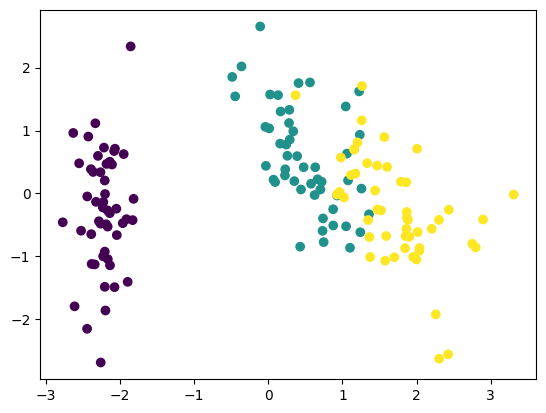

In [20]:
import matplotlib.pyplot as plt
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris.target)